[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\41350\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Reading from mastodon_output.ndjson...
Loaded 200 posts

Top 100 Keywords (after stopword removal):
https: 81
2025: 48
utm_source: 18
utm_medium: 18
mesonet: 15
agron: 15
iastate: 15
flipboard: 12
activitypub: 12
tech: 11
posted: 10
radio: 9
vtec: 9
board: 9
watch: 9
business: 9
creativity: 9
19t06: 8
news: 8
post: 8
para: 8
shoulder: 8
snow: 8
innovation: 8
creatividad: 8
cancels: 7
trump: 7
uttarakhand: 7
berlin: 7
playing: 6
theindiebeat: 6
mastodon: 6
result: 6
html: 6
prensa: 6
latina: 6
site: 6
vacature: 6
missing: 6
pour: 6
pain: 6
climate: 6
high: 6
precip: 6
202504190635: 6
kilx: 6
cdus43: 6
koun: 6
last: 5
call: 5
bonk: 5
live: 5
tornado: 5
portable: 5
testnet: 5
12th: 5
covid: 5
wetter: 5
como: 5
garden: 5
design: 5
till: 5
good: 5
lait: 5
travel: 5
heute: 5
trace: 5
rubertus: 5
never: 4
wave: 4
music: 4
artist: 4
time: 4
podcast: 4
auch: 4
planet: 4
thing: 4
trade: 4
bsky: 4
airdrop: 4
10th: 4
results: 4
terschelling: 4
union: 4
hier: 4
nicht: 4
lifestyle: 4
maison: 4
satu

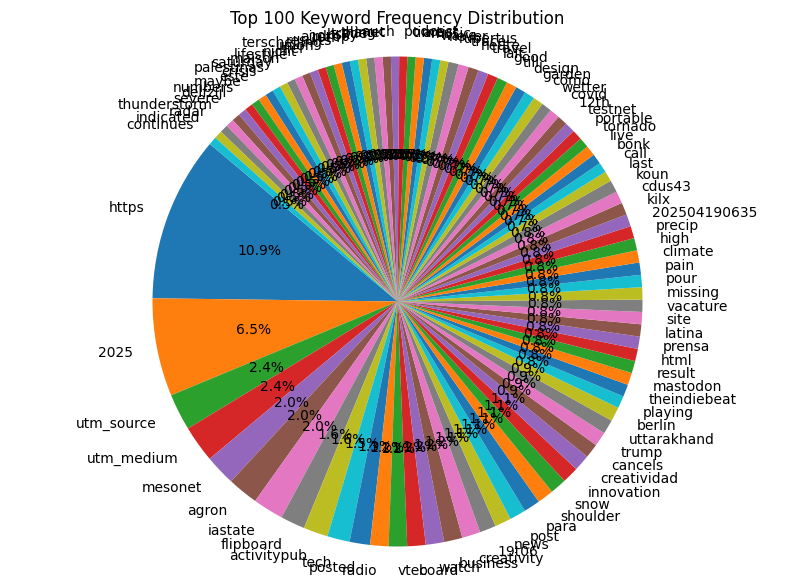


Sentiment Analysis Result: {'positive': 46, 'neutral': 98, 'negative': 56}


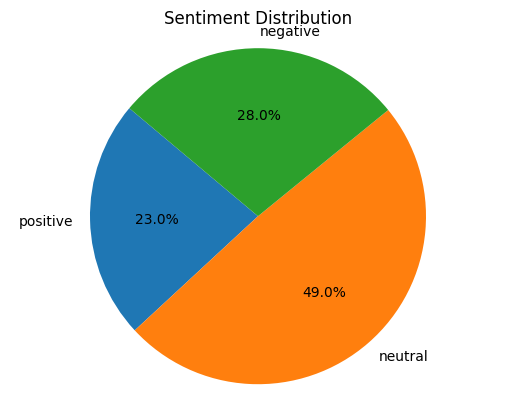

In [26]:
import os
import json
import re
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from datetime import datetime

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

DATA_FILE = "mastodon_output.ndjson"
OUTPUT_JSON = f"top100_keywords_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

def load_posts(file_path):
    if not os.path.exists(file_path):
        print(f"File '{file_path}' not found.")
        return []
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f if line.strip()]


def clean_html(html):
    return BeautifulSoup(html, "html.parser").get_text()


def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [w for w in words if len(w) > 3 and w not in stop_words]


def sentiment_analysis(texts):
    analyzer = SentimentIntensityAnalyzer()
    scores = {"positive": 0, "neutral": 0, "negative": 0}
    for text in texts:
        score = analyzer.polarity_scores(text)
        if score['compound'] >= 0.05:
            scores["positive"] += 1
        elif score['compound'] <= -0.05:
            scores["negative"] += 1
        else:
            scores["neutral"] += 1
    return scores


def main():
    print(f"\nReading from {DATA_FILE}...")
    posts = load_posts(DATA_FILE)
    print(f"Loaded {len(posts)} posts")

    contents = [clean_html(p["doc"]["content"]) for p in posts if p["doc"].get("content")]

    all_words = []
    for text in contents:
        all_words.extend(extract_keywords(text))

    word_freq = Counter(all_words)
    top_100 = word_freq.most_common(100)

    print("\nTop 100 Keywords (after stopword removal):")
    for word, freq in top_100:
        print(f"{word}: {freq}")

    labels = [item[0] for item in top_100]
    total_word_count = sum(word_freq.values())
    sizes = [freq / total_word_count * 100 for _, freq in top_100]
    output_data = {
        "timestamp": datetime.utcnow().isoformat() + "Z",
        "total_keywords": total_word_count,
        "top100": [{"word": word, "count": count} for word, count in top_100]
    }

    with open(OUTPUT_JSON, "w", encoding="utf-8") as f:
        json.dump(output_data, f, indent=2, ensure_ascii=False)

    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Top 100 Keyword Frequency Distribution")
    plt.axis('equal')
    plt.show()

    sentiment = sentiment_analysis(contents)
    print("\nSentiment Analysis Result:", sentiment)
    plt.pie(sentiment.values(), labels=sentiment.keys(), autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Distribution")
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
